# Assignment 2. Linear regression. Polynomial features. Regularization
## General Assignment

Before performing the practical work, you need download the dataset accordingly to the option on your machine (or cloud service)
1. Write a program that splits the original sample into a training set and a test set (training set, validation set, test set) with train_test_split method of Skikit Learn library
2. Using the scikit-learn library (http://scikit-learn.org/stable/), train the linear regression model for the training sample (example: http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py)
3. Check the accuracy of the model from the test set with r2_score
4. Build a model using a polynomial function (example: http://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html#sphx-glr-auto-examples-model-selection-plot-underfitting-overfitting-py). Build plots with the dependence of the accuracy (r2_score) on the degree of the polynomial function for training set and test set (validation curve).
5. Build a model using regularization (example: http://scikit-learn.org/stable/modules/linear_model.html). select one from Lasso or Ridge. On the basis of experiments, select parameters for regularization. Build plots with the dependence of the error (r2_score) on the regularization coefficient for train dataset and test dataset (validation curve).


## Options
Data sets are taken from the [UCI Machine Learning Repository]
(https://archive.ics.uci.edu/ml/datasets.php)
The option is determined by the data set, which can be downloaded from the link above:
1. Condition Based Maintenance of Naval Propulsion Plants
2. UJIIndoorLoc
3. Insurance Company Benchmark (COIL 2000)
4. KDD Cup 1998 Data
5. [Forest Fires](https://www.kaggle.com/elikplim/predict-the-burned-area-of-forest-fires)
6. Concrete Compressive Strength
7. Concrete Slump Test
8. Communities and Crime
9. Parkinsons Telemonitoring
10. YearPredictionMSD
11. Relative location of CT slices on axial axis
12. Individual household electric power consumption
13. Energy efficiency
14. 3D Road Network (North Jutland, Denmark)
15. ISTANBUL STOCK EXCHANGE
16. Buzz in social media
17. Physicochemical Properties of Protein Tertiary Structure
18. Gas Sensor Array Drift Dataset at Different Concentrations
19. SkillCraft1 Master Table Dataset
20. SML2010
21. Bike Sharing Dataset
22. Combined Cycle Power Plant
23. BlogFeedback




R2 score: 0.8957955165867995


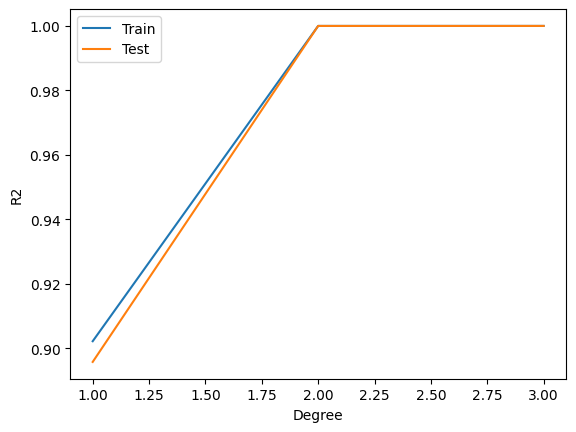

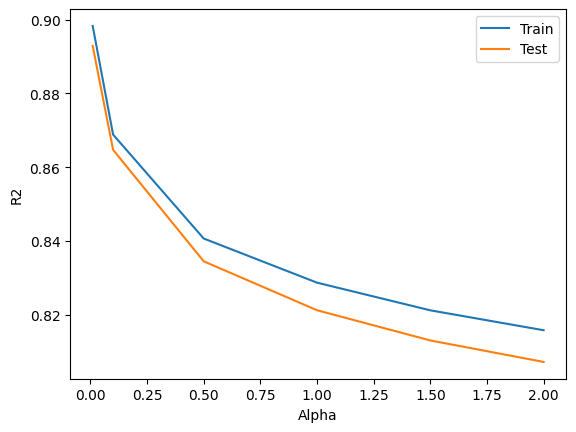

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import numpy as np

# Подгрузка данных
data_file = r'C:\Users\aizyk\PycharmProjects\ml\ml_course_en\assignments\UCI CBM Dataset\data.txt'

data_df = pd.read_csv(data_file, delim_whitespace=True)

X = data_df.drop('GT_Compressor_decay_state_coefficient.', axis=1)
y = data_df['GT_Compressor_decay_state_coefficient.']

# Разделение на тренировку и тест
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Линейная регрессия
lr = LinearRegression()
lr.fit(X_train, y_train)

# Подсчёт r2
y_pred = lr.predict(X_test)
print(f"R2 score: {r2_score(y_test, y_pred)}")


degrees = range (1, 4)
train_errors, test_errors = [], []
for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X_train)
    lr_poly = LinearRegression()
    lr_poly.fit(X_poly, y_train)
    train_errors.append(r2_score(y_train, lr_poly.predict(poly.transform(X_train))))
    test_errors.append(r2_score(y_test, lr_poly.predict(poly.transform(X_test))))

plt.plot(degrees, train_errors, label='Train')
plt.plot(degrees, test_errors, label='Test')
plt.xlabel('Degree')
plt.ylabel('R2')
plt.legend()
plt.show()


alphas = (0.01, 0.1, 0.5, 1, 1.5, 2)
train_errors, test_errors = [], []
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    train_errors.append(r2_score(y_train, ridge.predict(X_train)))
    test_errors.append(r2_score(y_test, ridge.predict(X_test)))

plt.plot(alphas, train_errors, label='Train')
plt.plot(alphas, test_errors, label='Test')
plt.xlabel('Alpha')
plt.ylabel('R2')
plt.legend()
plt.show()